In [2]:
import csv
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import numpy as np

In [3]:

task_data = pd.read_csv('all_beagle.csv',names=['run','tool','task_id','start','end','filename','file','success','library','platform','sizes','read_len','duration'])
job_data = pd.read_csv('output.csv',names=['run','tool','task_id','start','end','filename','file','success','library','platform','sizes','read_len','duration'])

In [4]:
files = job_data.file.unique()
runs=task_data.run.unique()

# Profiled tools
Belowo are the tools we have attempted to profile. Extracting data for ConcatVcf is in progress.

In [5]:
tools = task_data.tool.unique()
for n in tools:
    print(n)

BwaMem
IndexBam
PicardMarkDuplicates
Mutect
ConcatVcf
Strelka
RgMergeSort
ContigMergeSort
SamtoolsFlagstat


In [6]:
success = (task_data.success==True)


# Task-wise Summary Statistics

In [7]:
temp = ''
for n in tools:
    correct = task_data.tool==n
    temp = task_data[success & correct]
    print(n,temp.duration.describe())

('BwaMem', count      4352.000000
mean      59697.297941
std       47179.371722
min        1292.983000
25%       24582.189000
50%       51508.909500
75%       76634.140750
max      272378.470000
Name: duration, dtype: float64)
('IndexBam', count    182155.000000
mean       1787.423868
std       15081.776300
min           0.114000
25%          18.646000
50%          67.183000
75%         405.915500
max      217731.811000
Name: duration, dtype: float64)
('PicardMarkDuplicates', count    182155.000000
mean       2815.476639
std        4587.546064
min           0.142000
25%         437.249500
50%        1604.442000
75%        3225.346500
max      135568.933000
Name: duration, dtype: float64)
('Mutect', count    427428.000000
mean       2815.724617
std        4457.016730
min           0.157000
25%         904.882250
50%        2309.999500
75%        3446.415000
max      246075.579000
Name: duration, dtype: float64)
('ConcatVcf', count     3348.000000
mean      9007.598277
std      11770.160

# Job-wise summary statistics

In [8]:
temp = ''
for n in tools:
    correct = job_data.tool==n
    temp = job_data[success & correct]
    print(n,temp.duration.describe())

/Users/mattebaughman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


('BwaMem', count      1887.000000
mean     121323.706654
std      101274.007150
min        4891.765000
25%       47517.099500
50%       98286.177000
75%      169787.102000
max      920397.563000
Name: duration, dtype: float64)
('IndexBam', count    1.894000e+03
mean     1.690656e+05
std      1.129957e+06
min      6.916960e+02
25%      4.440049e+03
50%      1.001654e+04
75%      5.889917e+04
max      1.537693e+07
Name: duration, dtype: float64)
('PicardMarkDuplicates', count    1.894000e+03
mean     2.640543e+05
std      2.915157e+05
min      4.018437e+03
25%      9.980727e+04
50%      1.976150e+05
75%      3.071582e+05
max      2.583084e+06
Name: duration, dtype: float64)
('Mutect', count    9.860000e+02
mean     1.184749e+06
std      1.132955e+06
min      7.107651e+04
25%      5.932253e+05
50%      1.012997e+06
75%      1.457025e+06
max      1.309130e+07
Name: duration, dtype: float64)
('ConcatVcf', count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%     

# Log-scaled histograms of task durations by tool


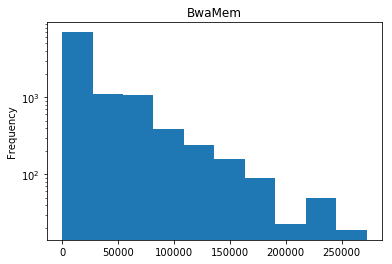

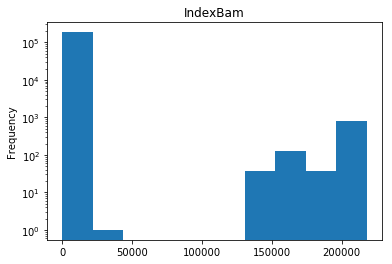

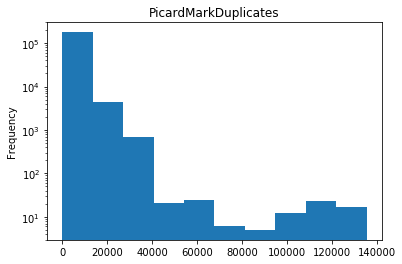

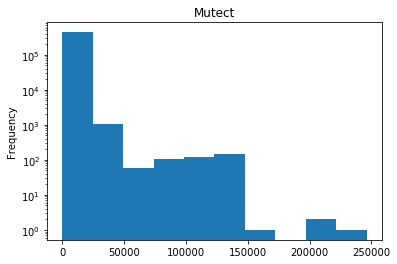

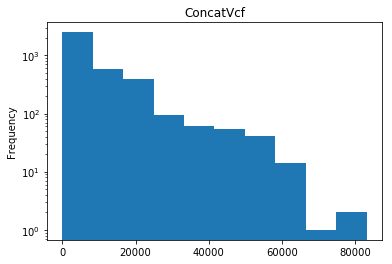

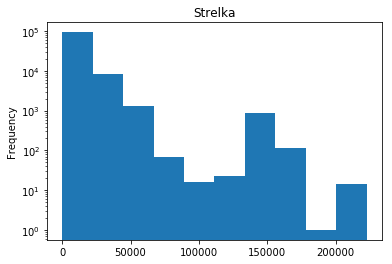

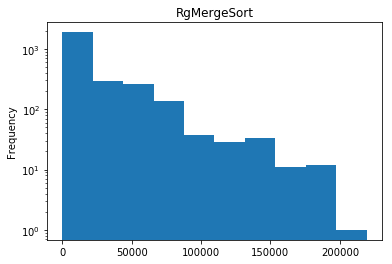

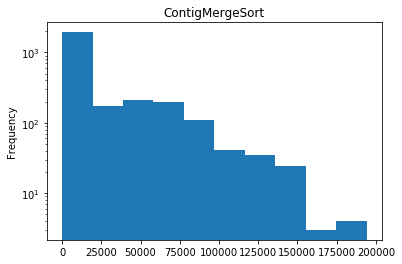

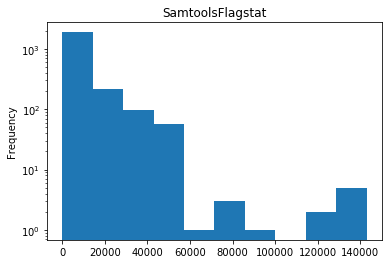

In [9]:
for k in tools:
    correct = task_data[task_data.tool == k]
    plt.figure()
    
    correct.duration.plot(kind='hist',title=k,logy=True)
    

# log-scaled histograms of job durations by tool

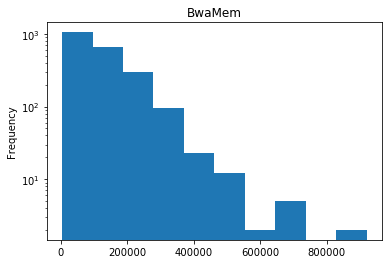

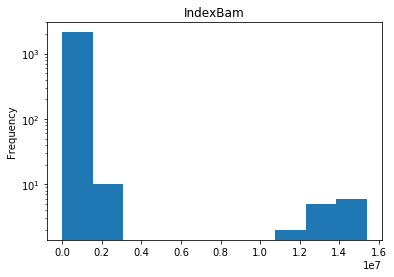

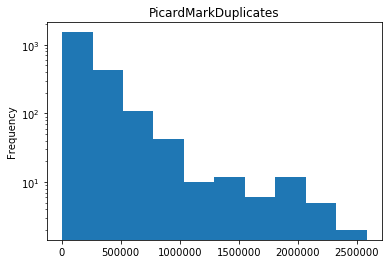

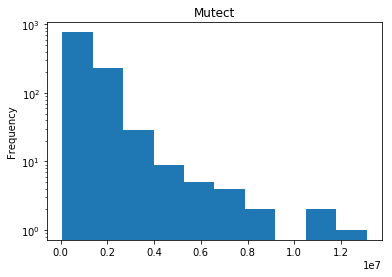

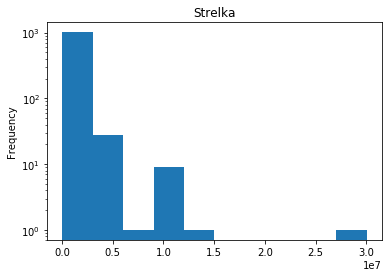

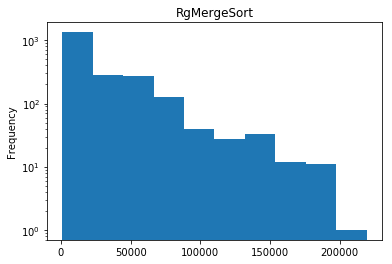

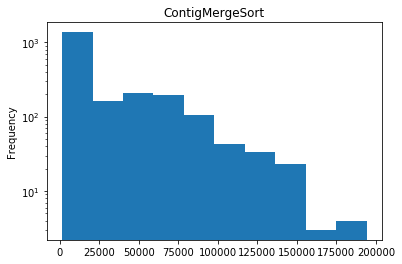

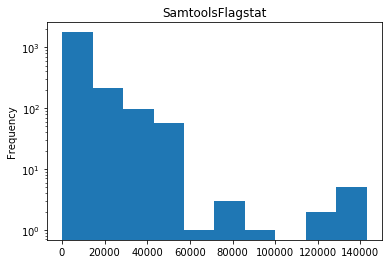

In [10]:
for k in tools:
    correct = job_data[job_data.tool == k]
    if len(correct.duration.tolist())>0:
        plt.figure()
    
        correct.duration.plot(kind='hist',title=k,logy=True)
    

# Task Duration vs. File size by tool

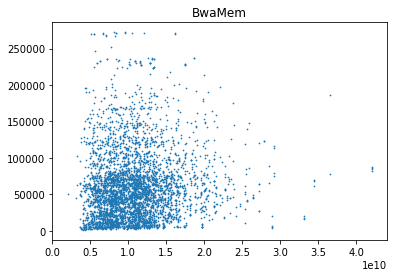

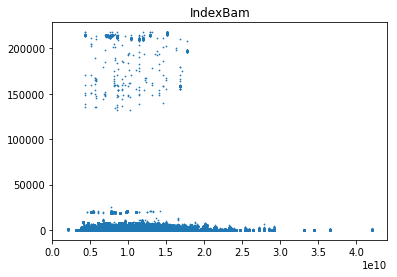

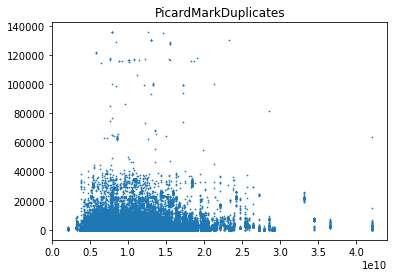

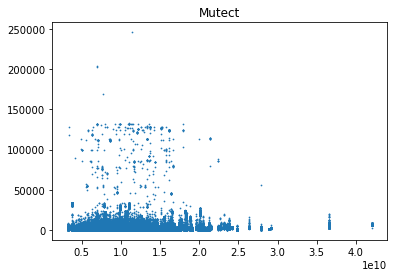

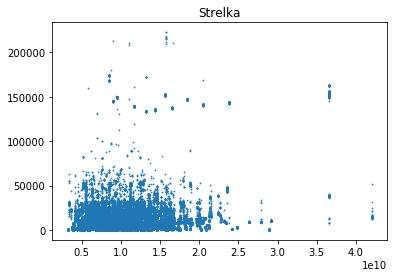

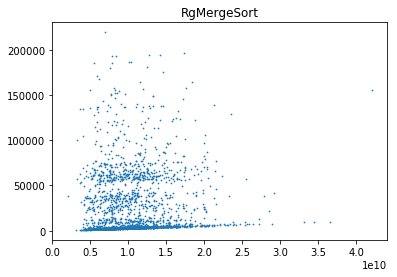

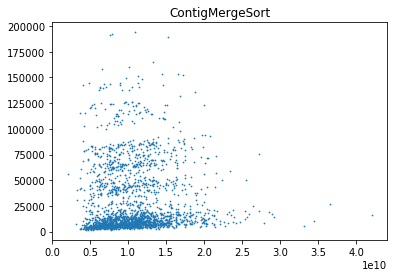

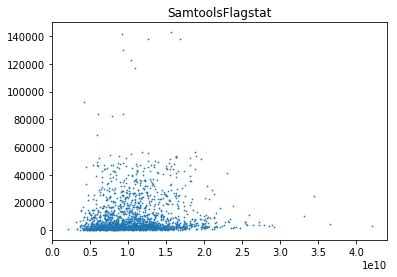

In [11]:
for k in tools:
    correct = task_data[task_data.tool==k].dropna(axis=0,how='any')
    correct = correct[correct.success==True]
    
    if correct.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct.sizes,correct.duration,s=.5)
   

# Job duration vs. file size by tool

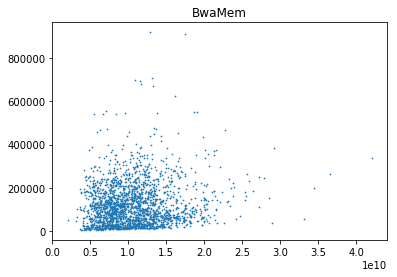

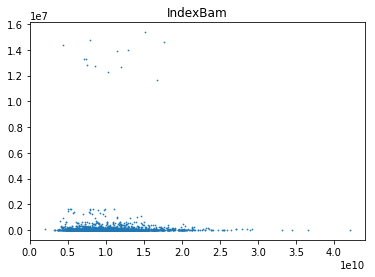

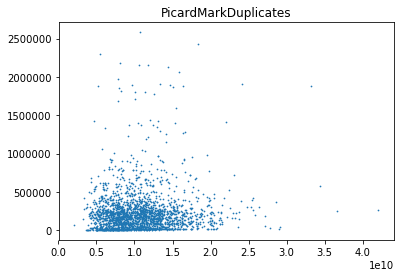

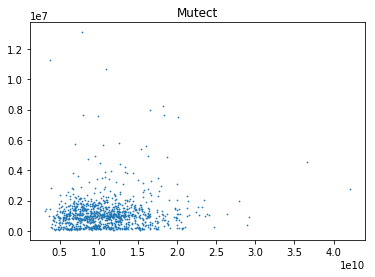

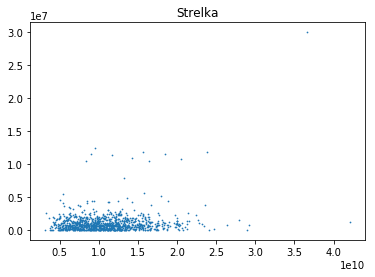

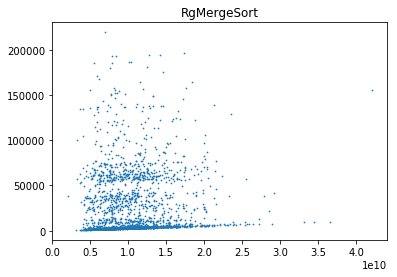

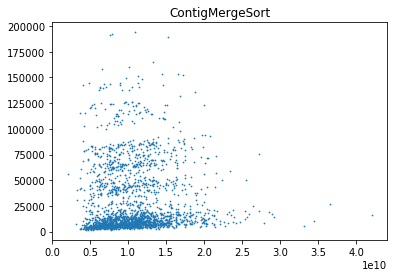

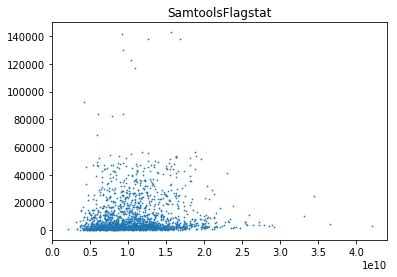

In [12]:
for k in tools:
    correct = job_data[job_data.tool==k].dropna(axis=0,how='any')
    correct = correct[correct.success==True]
    
    if correct.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct.sizes,correct.duration,s=.5)
   

# Box plots of task durations by tool

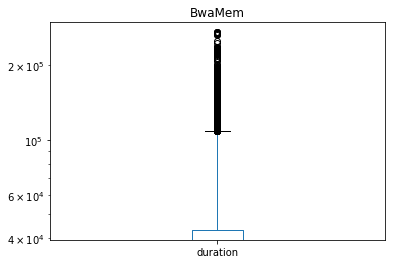

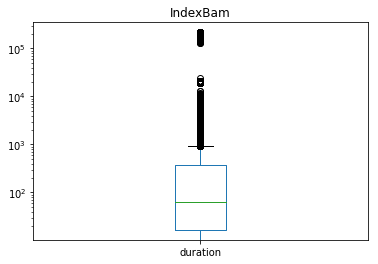

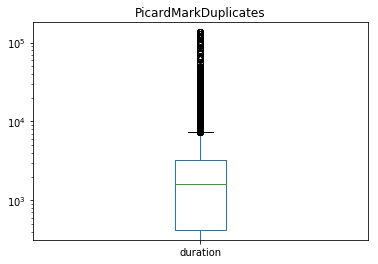

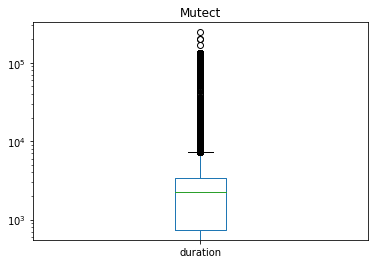

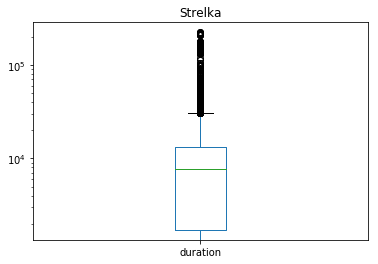

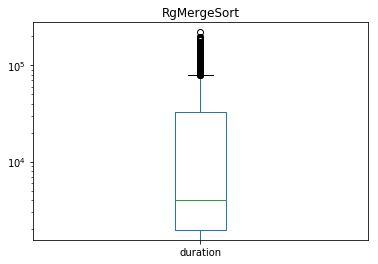

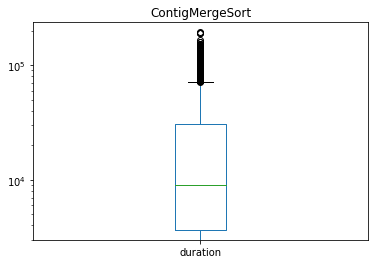

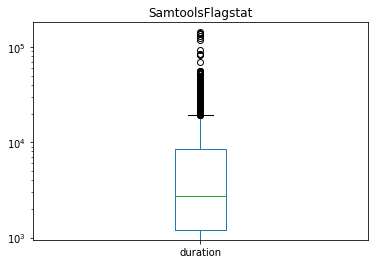

In [13]:
for p in tools:
    correct2=task_data[task_data.tool==p].dropna(axis=0,how='any')
    
    if correct2.duration.size != 0:
        plt.figure()
        correct2.duration.plot(kind='box',logy=True,title=p)

# Box plots of job durations by tool


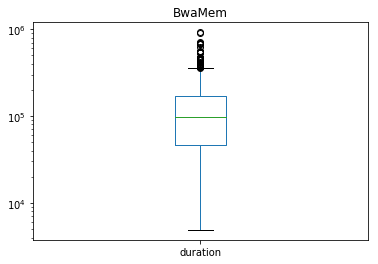

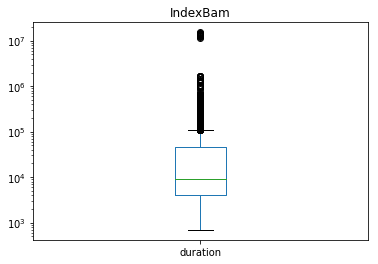

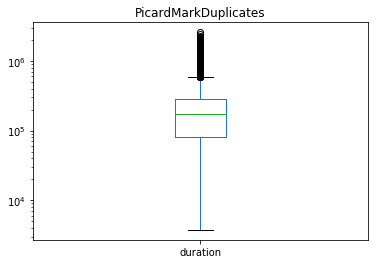

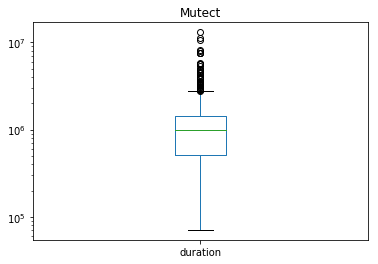

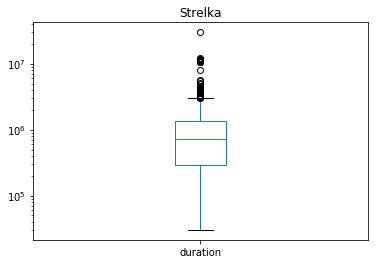

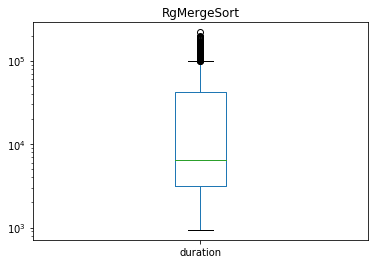

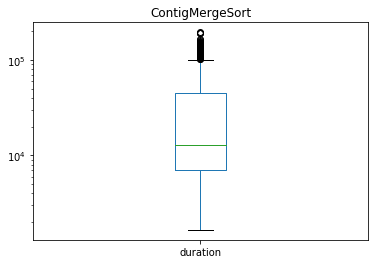

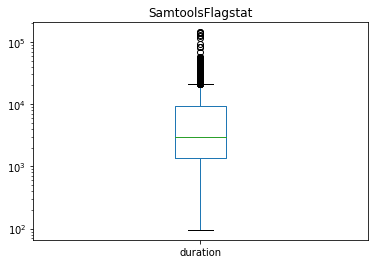

In [14]:
for p in tools:
    correct2=job_data[job_data.tool==p].dropna(axis=0,how='any')
    
    if correct2.duration.size != 0:
        plt.figure()
        correct2.duration.plot(kind='box',logy=True,title=p)

# Task duration vs. file size by tool, outliers removed

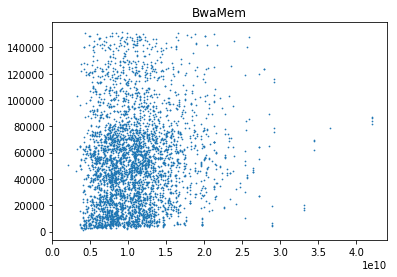

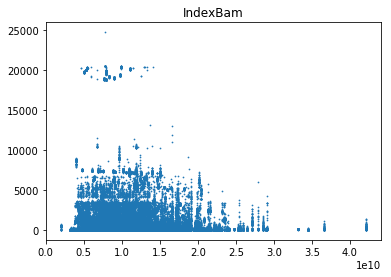

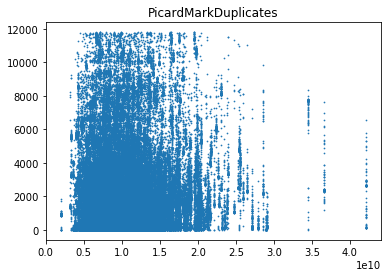

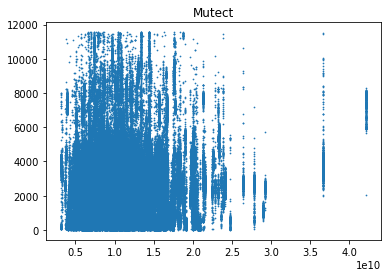

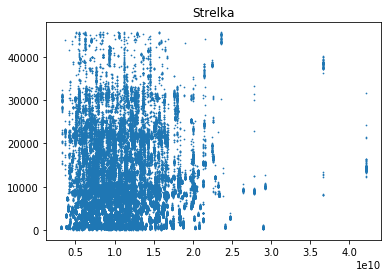

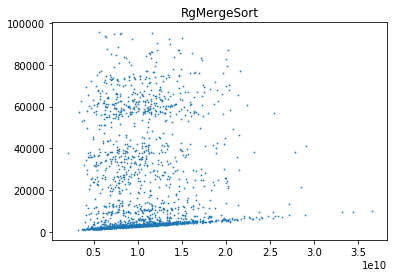

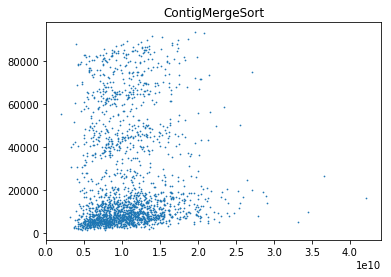

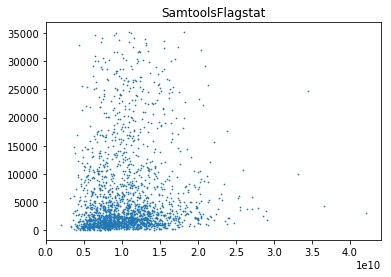

In [15]:
for k in tools:
    correct = task_data[task_data.tool==k].dropna(axis=0,how='any')
    correct = correct[correct.success==True]
    correct = correct[np.abs(correct.duration-correct.duration.mean())<=(1.96*correct.duration.std())]
    
    '''
    print(len(correct))
    for p in correct:
        print(correct)
    '''
    #print(len(correct.size.tolist()),len(correct.duration))
    if correct.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct.sizes,correct.duration,s=.5)

# Job durations vs file size by tool, outliers removed

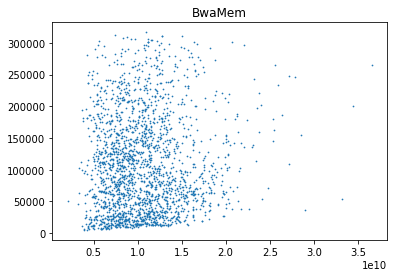

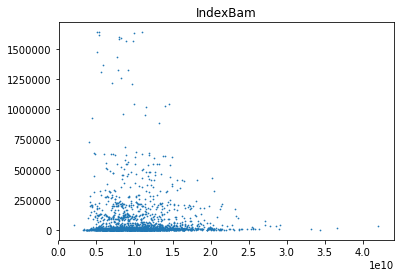

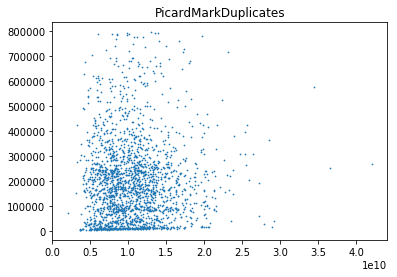

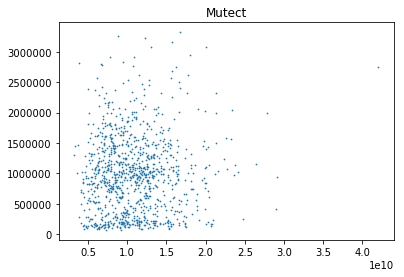

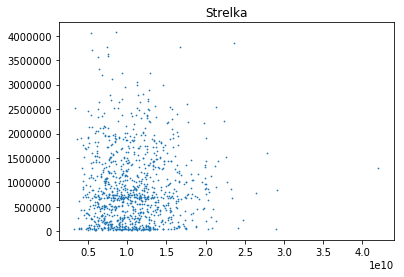

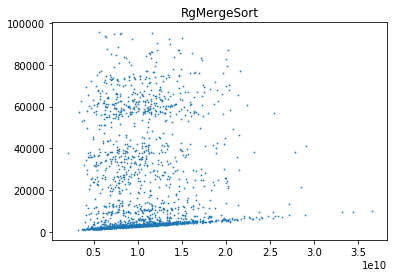

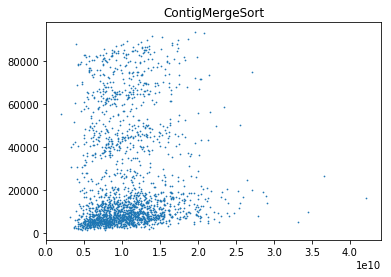

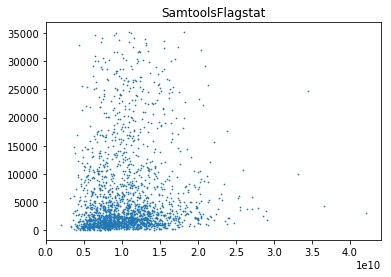

In [16]:
for k in tools:
    correct = job_data[job_data.tool==k].dropna(axis=0,how='any')
    correct = correct[correct.success==True]
    correct = correct[np.abs(correct.duration-correct.duration.mean())<=(1.96*correct.duration.std())]
    
    '''
    print(len(correct))
    for p in correct:
        print(correct)
    '''
    #print(len(correct.size.tolist()),len(correct.duration))
    if correct.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct.sizes,correct.duration,s=.5)

# Task duration vs file size by tool, outliers removed, equal scaling

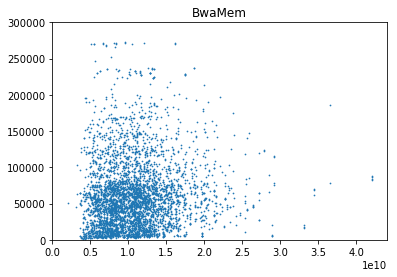

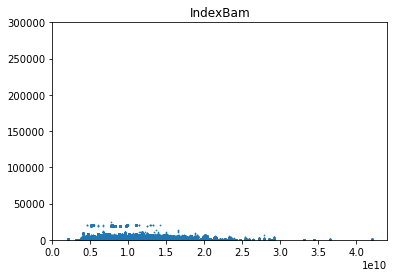

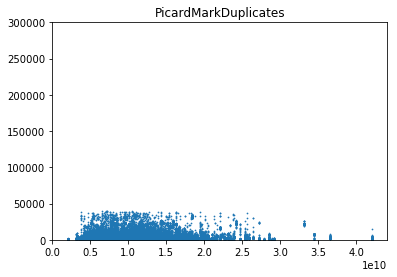

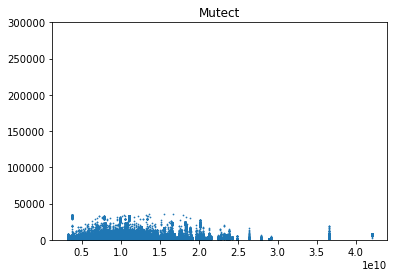

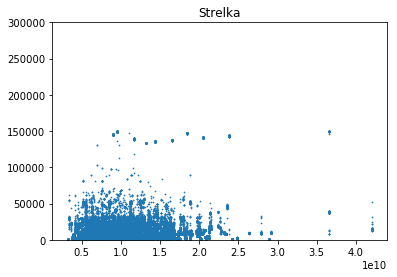

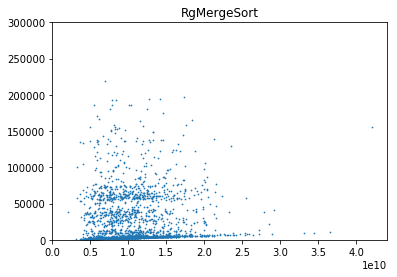

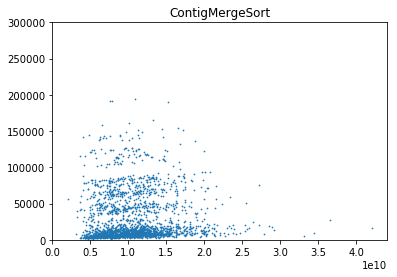

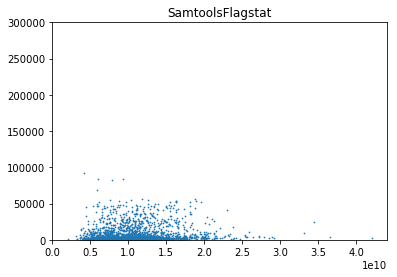

In [17]:
for k in tools:
    correct1 = task_data[task_data.tool==k].dropna(axis=0,how='any')
    correct1 = correct1[correct1.success==True]
    correct1 = correct1[np.abs(correct1.duration-correct1.duration.mean())<=(8*correct1.duration.std())]
    
    '''
    print(len(correct))
    for p in correct:
        print(correct)
    '''
    #print(len(correct.size.tolist()),len(correct.duration))
    if correct1.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct1.sizes,correct1.duration,s=.5)
        plt.ylim(0,300000)
        plt.xlim()

# job durations vs file size by tool, outliers removed, log scaling

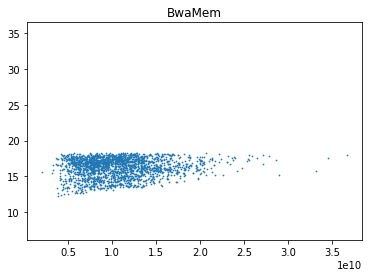

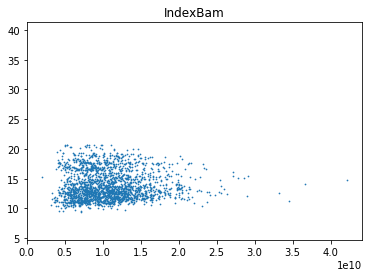

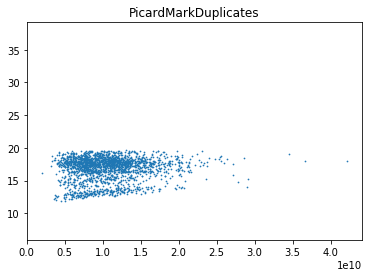

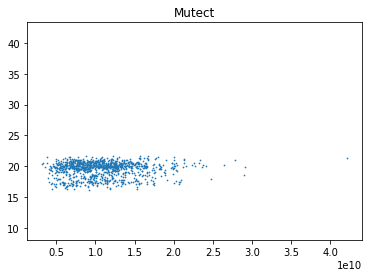

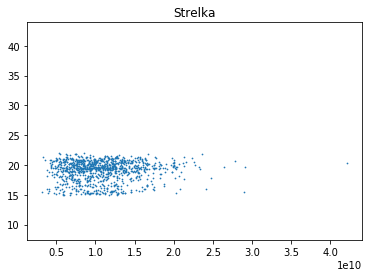

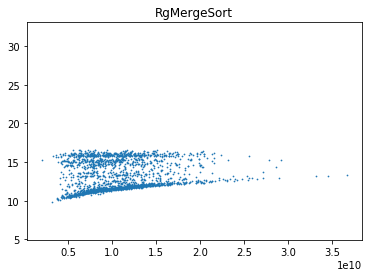

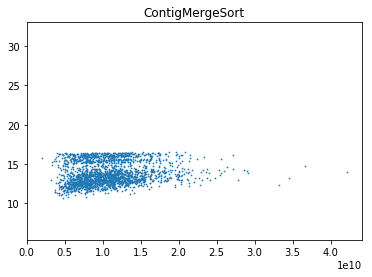

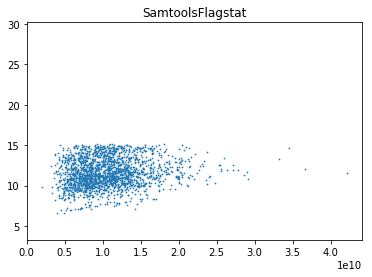

In [18]:
for k in tools:
    correct1 = job_data[job_data.tool==k].dropna(axis=0,how='any')
    correct1 = correct1[correct1.success==True]
    correct1 = correct1[np.abs(correct1.duration-correct1.duration.mean())<=(1.96*correct1.duration.std())]
    
    '''
    print(len(correct))
    for p in correct:
        print(correct)
    '''
    #print(len(correct.size.tolist()),len(correct.duration))
    if correct1.duration.size!=0:
        plt.figure()
        plt.title(k)
        
        plt.scatter(correct1.sizes,np.log2(correct1.duration),s=.5)
        
        plt.ylim(.5*min(np.log2(correct1.duration)),2*max(np.log2(correct1.duration)))
        plt.xlim()

# task duration vs file size by tool, color-coded by run

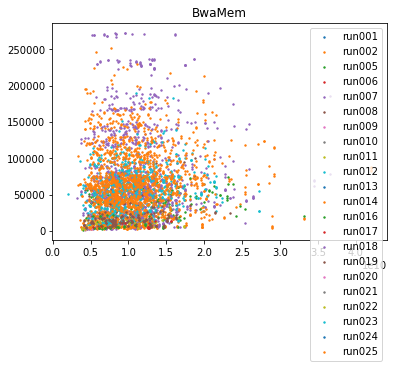

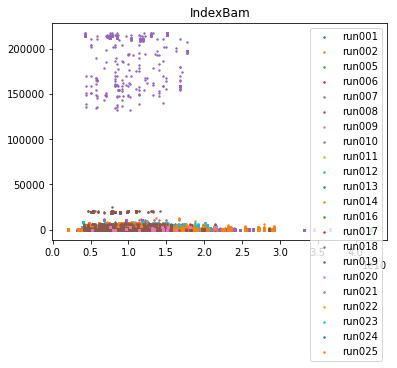

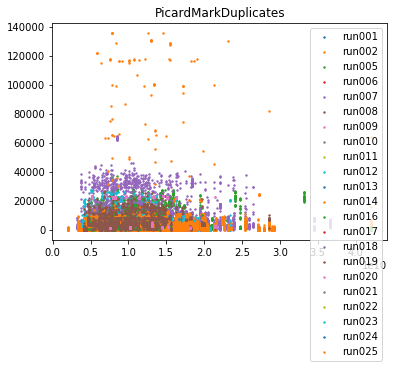

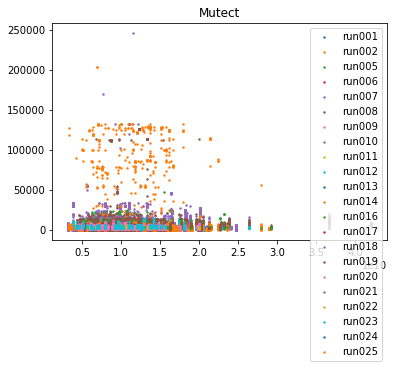

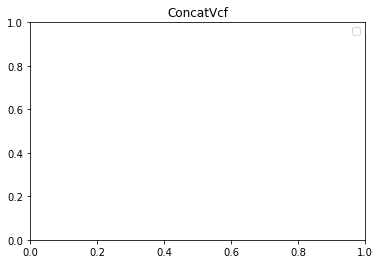

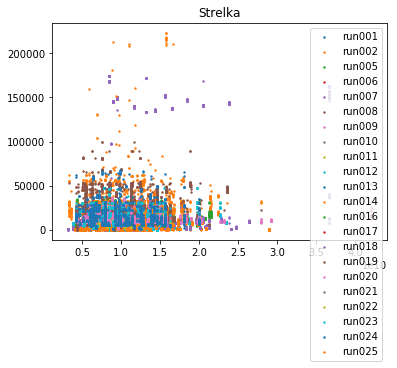

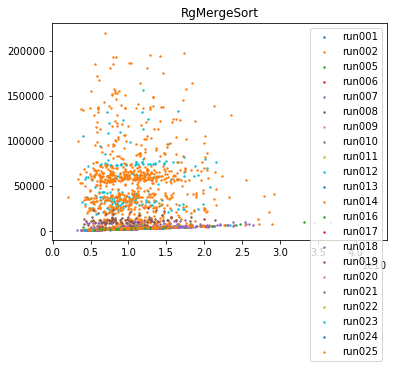

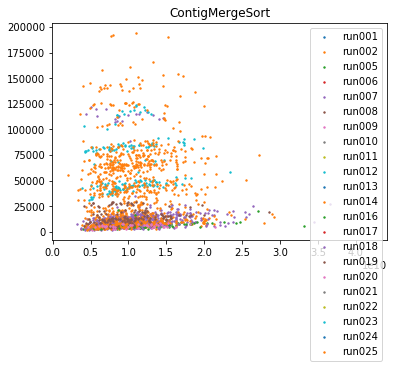

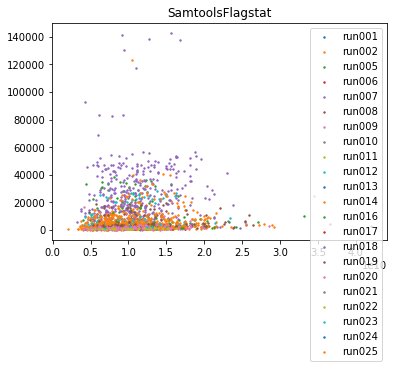

In [19]:

for n in tools:
    plt.figure()
    plt.title(n)
    temp=task_data[task_data.tool==n].dropna(axis=0,how='any')
    temp=temp[temp.success==True]
    if len(temp.duration.tolist())>0:
        for k in runs:
            run_temp=temp[temp.run==k]
            plt.scatter(x=run_temp.sizes,y=run_temp.duration,s=2)
    plt.legend(runs)
            
    

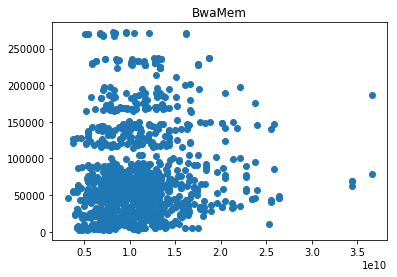

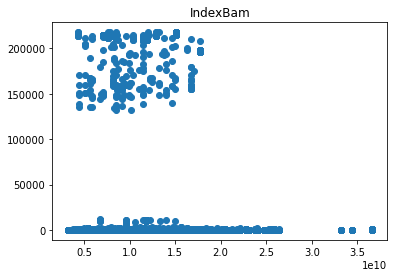

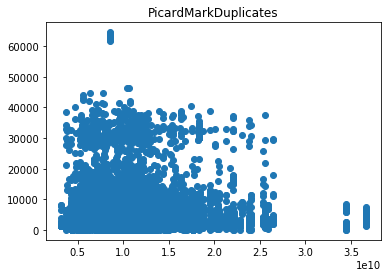

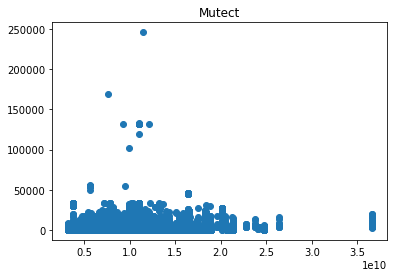

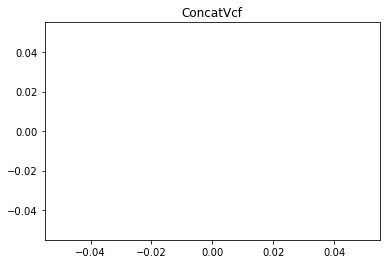

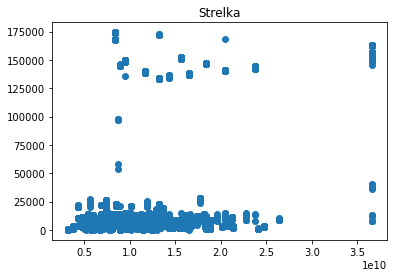

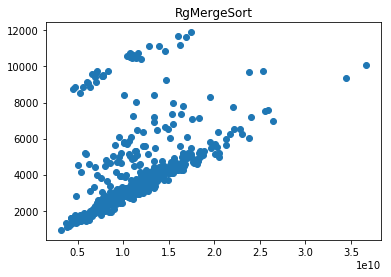

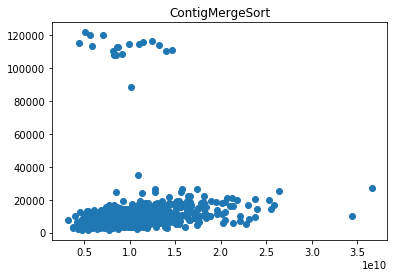

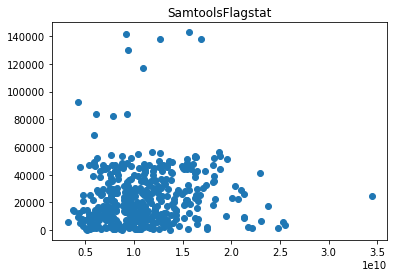

In [20]:

for n in tools:
    plt.figure()
    plt.title(n)
    temp=task_data[task_data.tool==n].dropna(axis=0,how='any')
    temp=temp[temp.success==True]
    temp=temp[temp.run=='run007']
         
    plt.scatter(x=temp.sizes,y=temp.duration)
    

In [34]:
temp = job_data
results=df(index=files,columns=tools)

results=results.drop(['ConcatVcf'],axis=1)

for n in files:
    if n!='ConcatVcf':
        for k in tools:
            to_search = temp[temp.file==n].dropna(axis=0,how='any')
            to_search = to_search[to_search.tool==k]
            if len(to_search.duration.tolist())==1:
                if len(to_search.sizes.tolist())==1:
                    results.loc[n,k]=[to_search.sizes.tolist()[0],to_search.duration.tolist()[0]]

In [35]:
results.to_csv('results.csv')
print(results)

                                                                       BwaMem  \
TCGA-A8-A09I-10A-01W-A055-09_IlluminaGA-DNASeq_...   [12349480912, 55963.459]   
9d7c1e8652ae4f3f33468eb26b560f28                       [5006847890, 5740.833]   
TCGA-AR-A0TU-01A-31D-A10G-09_IlluminaGA-DNASeq_...  [11046393735, 139117.091]   
TCGA-C8-A12M-01A-11D-A135-09_IlluminaGA-DNASeq_...    [9164597243, 32325.452]   
a37153e0f7b36e8544d4d8035fd426e9                      [5941199627, 67081.084]   
TCGA-E2-A153-01A-12D-A12B-09_IlluminaGA-DNASeq_...   [17410883608, 51874.355]   
8300725442d212c83e3534196af2fe8f                      [5972747932, 17311.752]   
614ba146c47a7ac9b7019013effc26d3                    [11635224786, 146053.235]   
TCGA-AR-A0TP-10A-01D-A099-09_IlluminaGA-DNASeq_...    [8374284163, 25549.947]   
b6f74717afa0ee307706412bea649cbc                     [10232083043, 39604.374]   
3c7edd9e52e76aefb62ca2126a047b68                     [11237156740, 25047.592]   
03208e754d13a48950c40a4121de

In [36]:
sizes_df=df(columns=['Sizes','Sums'])
results=results.dropna(axis=0,how='any')
print(results)

                                                                       BwaMem  \
9d7c1e8652ae4f3f33468eb26b560f28                       [5006847890, 5740.833]   
TCGA-AR-A0TU-01A-31D-A10G-09_IlluminaGA-DNASeq_...  [11046393735, 139117.091]   
TCGA-C8-A12M-01A-11D-A135-09_IlluminaGA-DNASeq_...    [9164597243, 32325.452]   
a37153e0f7b36e8544d4d8035fd426e9                      [5941199627, 67081.084]   
TCGA-E2-A153-01A-12D-A12B-09_IlluminaGA-DNASeq_...   [17410883608, 51874.355]   
8300725442d212c83e3534196af2fe8f                      [5972747932, 17311.752]   
614ba146c47a7ac9b7019013effc26d3                    [11635224786, 146053.235]   
3c7edd9e52e76aefb62ca2126a047b68                     [11237156740, 25047.592]   
03208e754d13a48950c40a4121de858a                       [5818952070, 6728.929]   
7457dcc94da82ef8520a2598cc384aec                       [6984905264, 7402.579]   
8d45613d92ad328eca0ccf352689a94b                       [6736044565, 6778.176]   
b01d1831ce6dc27633173eeaffe4

In [50]:
final=results.join(sizes_df)
final.to_csv('final.csv')
print(tools)

['BwaMem' 'IndexBam' 'PicardMarkDuplicates' 'Mutect' 'ConcatVcf' 'Strelka'
 'RgMergeSort' 'ContigMergeSort' 'SamtoolsFlagstat']


In [53]:
parsed_files=final.index.values
parsed_tools=final.columns.values
for k in parsed_files:
    final.loc[k,'Sizes']=final.loc[k,tools[0]][0]


    file_dur=0
    for p in tools:
        if p != 'ConcatVcf':
            #print(p,final.loc[k,p])
            file_dur+=final.loc[k,p][1]
            #final.loc[k,p]=final.loc[k,p]
    final.loc[k,'Sums']=file_dur
    print(file_dur)
 

195657.461
1210973.294
298248.634
284915.836
1579090.724
226957.844
2351511.417
319656.906
381161.744
368034.011
1308802.469
935532.377
1073989.427
376700.06
273233.398
256116.648
645810.224
581687.542
238787.131
833040.448
1147318.291
305825.788
399272.917
394289.732
322750.531
539083.36
1072023.616
219402.745
349938.695
1135488.176
522548.388
1090544.828
339040.891
339987.584
747537.069
2618182.814
242962.196
1073093.813
1641040.808
228693.023
706761.283
482141.794
982889.125
450271.183
280826.133
571681.837
2102756.22
470930.832
804824.081
325981.204
932350.725
2085466.406
2176227.273
1420975.507
471587.445
540989.271
517811.382
852647.581
467316.874
1346868.908
1577620.126
900446.032
1099703.553
213776.846
911309.033
920422.171
1972966.082
431564.725
244624.126
247326.273
399480.913
2760404.024
543859.029
1114128.879
392206.887
1380504.543
460037.099
1713048.281
2335687.932
856280.508
309790.87
6057971.704
363463.432
831108.601
2190099.523
1046386.039
537591.399
1981201.56
1769246.

In [54]:
final.to_csv('final1.csv')

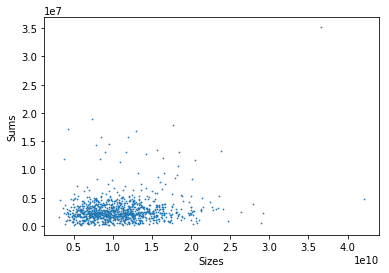

In [59]:
plt.figure()
final.plot.scatter(x='Sizes',y='Sums',s=0.5)

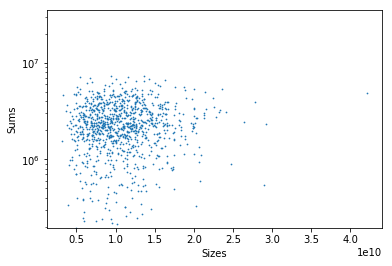

In [62]:
trimmed_final = final[np.abs(final.Sums-final.Sums.mean())<=(1.96*final.Sums.std())]
trimmed_final.plot(kind='scatter',x='Sizes',y='Sums',s=0.5,ylim=[0,35000000],logy=True)

In [64]:
con_data=task_data[task_data.dropna(axis=0,how='any')]
con_data=con_data[con_data.success==True]

ValueError: Must pass DataFrame with boolean values only